Exercise 1: Implementation of Naive Bayes Algorithm

Build a Sentiment Analysis Model for IMDB Movie Review Dataset

Part - 1


In [ ]:
import pandas as pd
import re
import nltk

from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

# Download stopwords
nltk.download('stopwords')

# Load dataset
dataset = pd.read_csv("/content/drive/MyDrive/connection/IMDB Dataset.csv")

# Initialize stemmer and stopwords
ps = PorterStemmer()
stop_words = set(stopwords.words('english'))

# Text preprocessing function
def preprocess_text(text):
    text = text.lower()
    text = re.sub('[^a-z]', ' ', text)
    words = text.split()
    words = [ps.stem(word) for word in words if word not in stop_words]
    return ' '.join(words)

# Apply preprocessing
dataset['review'] = dataset['review'].apply(preprocess_text)

# Encode sentiment labels
dataset['sentiment'] = dataset['sentiment'].map({'positive': 1, 'negative': 0})

# Split dataset (80% train, 20% test)
X = dataset['review']
y = dataset['sentiment']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Bag-of-Words model
vectorizer = CountVectorizer(max_features=5000)
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Train Naive Bayes classifier
model = MultinomialNB()
model.fit(X_train_vec, y_train)

# Predict
y_pred = model.predict(X_test_vec)

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Accuracy: 0.8494

Classification Report:

              precision    recall  f1-score   support

           0       0.84      0.85      0.85      4961
           1       0.85      0.84      0.85      5039

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Task -2

Accuracy: 0.8494

Precision: 0.8549326903757284
Recall: 0.8444135741218496
F1-score: 0.8496405750798722

Confusion Matrix:
 [[4239  722]
 [ 784 4255]]

ROC-AUC Score: 0.912517937591323


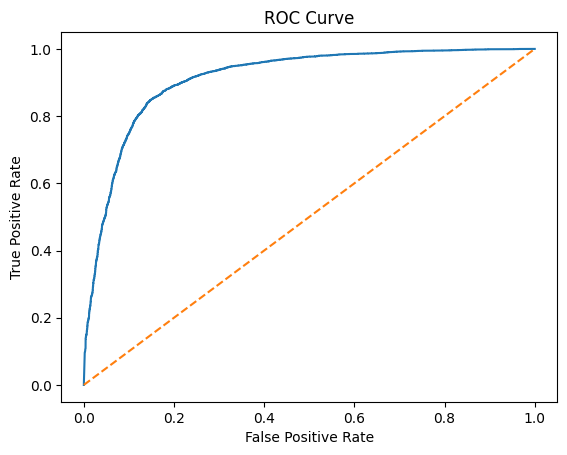

In [ ]:
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    roc_auc_score,
    roc_curve
)
import matplotlib.pyplot as plt

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Precision, Recall, F1-score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("\nPrecision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:\n", cm)

# ROC-AUC Score
y_prob = model.predict_proba(X_test_vec)[:, 1]
roc_auc = roc_auc_score(y_test, y_prob)
print("\nROC-AUC Score:", roc_auc)

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

plt.figure()
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.show()


Feature Selection Using Wrapper Methods

Part -1 Data Loading and preprocessing

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score
)


In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split

# DataSet Lode
data = pd.read_csv("/content/drive/MyDrive/connection/breast-cancer_with_header.csv", encoding='latin1')

# Display first few rows
print("Dataset Preview:")
display(data.head())

# Dataset information
print("\nDataset Info:")
data.info()

# Summary statistics
print("\nSummary Statistics:")
display(data.describe())

# Check missing values
print("\nMissing Values:")
print(data.isnull().sum())

# Handle missing values (mean imputation)
data.fillna(data.mean(numeric_only=True), inplace=True)


X = data.drop("Class", axis=1)
y = data["Class"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("\nTraining set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)


Dataset Preview:


,Class,age,menopause,tumor_size,inv_nodes,node_caps,deg_malig,breast,breast_quad,irradiat
0,no-recurrence-events,30-39,premeno,30-34,0-2,no,3,left,left_low,no
1,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,right,right_up,no
2,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,left,left_low,no
3,no-recurrence-events,60-69,ge40,15-19,0-2,no,2,right,left_up,no
4,no-recurrence-events,40-49,premeno,0-4,0-2,no,2,right,right_low,no



Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286 entries, 0 to 285
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Class        286 non-null    object
 1   age          286 non-null    object
 2   menopause    286 non-null    object
 3   tumor_size   286 non-null    object
 4   inv_nodes    286 non-null    object
 5   node_caps    286 non-null    object
 6   deg_malig    286 non-null    int64 
 7   breast       286 non-null    object
 8   breast_quad  286 non-null    object
 9   irradiat     286 non-null    object
dtypes: int64(1), object(9)
memory usage: 22.5+ KB

Summary Statistics:


,deg_malig
count,286.000000
mean,2.048951
std,0.738217
min,1.000000
25%,2.000000
50%,2.000000
75%,3.000000
max,3.000000



Missing Values:
Class          0
age            0
menopause      0
tumor_size     0
inv_nodes      0
node_caps      0
deg_malig      0
breast         0
breast_quad    0
irradiat       0
dtype: int64

Training set shape: (228, 9)
Testing set shape: (58, 9)


Part -2 Apply a wrapper Method

Top 5 Selected Features:
Index(['deg_malig', 'age_70-79', 'tumor_size_10-14', 'tumor_size_5-9',
       'inv_nodes_0-2'],
      dtype='object')


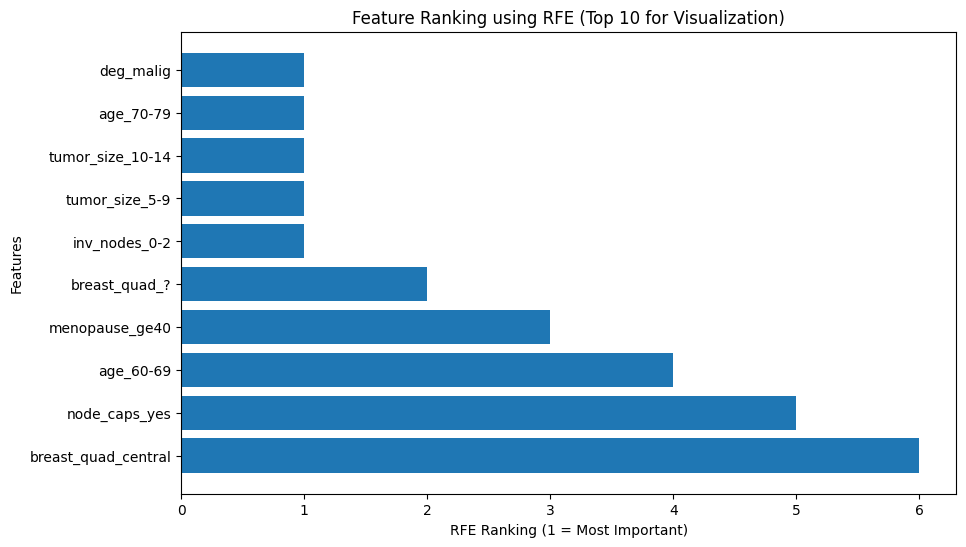

LogisticRegression(max_iter=1000)

In [17]:
import numpy as np
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
import matplotlib.pyplot as plt

# Identify categorical and numerical columns
categorical_cols = X_train.select_dtypes(include=['object']).columns
numerical_cols = X_train.select_dtypes(include=np.number).columns

# Apply One-Hot Encoding to categorical features
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
X_train_encoded = encoder.fit_transform(X_train[categorical_cols])
X_test_encoded = encoder.transform(X_test[categorical_cols])

# Convert encoded arrays to DataFrames with feature names
X_train_encoded_df = pd.DataFrame(X_train_encoded, columns=encoder.get_feature_names_out(categorical_cols), index=X_train.index)
X_test_encoded_df = pd.DataFrame(X_test_encoded, columns=encoder.get_feature_names_out(categorical_cols), index=X_test.index)

# Combine encoded categorical features with numerical features
X_train_processed = pd.concat([X_train[numerical_cols], X_train_encoded_df], axis=1)
X_test_processed = pd.concat([X_test[numerical_cols], X_test_encoded_df], axis=1)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_processed)
X_test_scaled = scaler.transform(X_test_processed)

# Logistic Regression model
log_reg = LogisticRegression(max_iter=1000)

# Apply RFE to select top 5 features
rfe = RFE(estimator=log_reg, n_features_to_select=5)
rfe.fit(X_train_scaled, y_train)

# Get selected features and rankings
# Recreate column names after encoding and scaling for RFE output interpretation
all_processed_features = X_train_processed.columns
selected_features = all_processed_features[rfe.support_]

feature_ranking = pd.DataFrame({
    "Feature": all_processed_features,
    "Ranking": rfe.ranking_
}).sort_values(by="Ranking")

print("Top 5 Selected Features:")
print(selected_features)

# Visualize feature rankings
plt.figure(figsize=(10, 6))
plt.barh(feature_ranking["Feature"].head(10), feature_ranking["Ranking"].head(10))
plt.xlabel("RFE Ranking (1 = Most Important)")
plt.ylabel("Features")
plt.title("Feature Ranking using RFE (Top 10 for Visualization)")
plt.gca().invert_yaxis()
plt.show()

# Train Logistic Regression using selected features
X_train_selected = X_train_scaled[:, rfe.support_]
X_test_selected = X_test_scaled[:, rfe.support_]

log_reg_selected = LogisticRegression(max_iter=1000)
log_reg_selected.fit(X_train_selected, y_train)


Part-3 :- Model Evaluation

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score
)

log_reg_all = LogisticRegression(max_iter=1000)
log_reg_all.fit(X_train_scaled, y_train)

y_pred_all = log_reg_all.predict(X_test_scaled)
y_prob_all = log_reg_all.predict_proba(X_test_scaled)[:, 1]

# Map y_test string labels to numerical for ROC-AUC calculation
y_test_numerical = y_test.map({'no-recurrence-events': 0, 'recurrence-events': 1})

print("=== Model with All Features ===")
print("Accuracy:", accuracy_score(y_test, y_pred_all))
print("Precision:", precision_score(y_test, y_pred_all, pos_label='recurrence-events'))
print("Recall:", recall_score(y_test, y_pred_all, pos_label='recurrence-events'))
print("F1-score:", f1_score(y_test, y_pred_all, pos_label='recurrence-events'))
print("ROC-AUC:", roc_auc_score(y_test_numerical, y_prob_all))

# --- Model 2: Using Selected Features (Top 5) ---
y_pred_sel = log_reg_selected.predict(X_test_selected)
y_prob_sel = log_reg_selected.predict_proba(X_test_selected)[:, 1]

print("\n=== Model with Selected Features (Top 5) ===")
print("Accuracy:", accuracy_score(y_test, y_pred_sel))
print("Precision:", precision_score(y_test, y_pred_sel, pos_label='recurrence-events'))
print("Recall:", recall_score(y_test, y_pred_sel, pos_label='recurrence-events'))
print("F1-score:", f1_score(y_test, y_pred_sel, pos_label='recurrence-events'))
print("ROC-AUC:", roc_auc_score(y_test_numerical, y_prob_sel))


=== Model with All Features ===
Accuracy: 0.6379310344827587
Precision: 0.5
Recall: 0.19047619047619047
F1-score: 0.27586206896551724
ROC-AUC: 0.6924066924066923

=== Model with Selected Features (Top 5) ===
Accuracy: 0.6896551724137931
Precision: 1.0
Recall: 0.14285714285714285
F1-score: 0.25
ROC-AUC: 0.7027027027027027


Part-4 :-Experiment

In [19]:
def train_rfe_model(n_features):
    rfe = RFE(LogisticRegression(max_iter=1000), n_features_to_select=n_features)
    rfe.fit(X_train_scaled, y_train)
    X_train_rfe = X_train_scaled[:, rfe.support_]
    X_test_rfe = X_test_scaled[:, rfe.support_]

    model = LogisticRegression(max_iter=1000)
    model.fit(X_train_rfe, y_train)

    y_pred = model.predict(X_test_rfe)
    acc = accuracy_score(y_test, y_pred)
    return acc, rfe.support_

# Top 3 Features
acc_top3, sel_top3 = train_rfe_model(3)
print("Top 3 Features Accuracy:", acc_top3)
print("Selected Features:", all_processed_features[sel_top3].tolist())

# Top 7 Features
acc_top7, sel_top7 = train_rfe_model(7)
print("\nTop 7 Features Accuracy:", acc_top7)
print("Selected Features:", all_processed_features[sel_top7].tolist())

# Discussion:
print("\nDiscussion:")
print("- Using fewer features (top 3) may reduce accuracy if important info is lost.")
print("- Using more features (top 5-7) may improve performance or generalization.")
print("- RFE helps reduce redundant features and improves model interpretability.")


Top 3 Features Accuracy: 0.6896551724137931
Selected Features: ['deg_malig', 'tumor_size_10-14', 'inv_nodes_0-2']

Top 7 Features Accuracy: 0.6896551724137931
Selected Features: ['deg_malig', 'age_70-79', 'menopause_ge40', 'tumor_size_10-14', 'tumor_size_5-9', 'inv_nodes_0-2', 'breast_quad_?']

Discussion:
- Using fewer features (top 3) may reduce accuracy if important info is lost.
- Using more features (top 5-7) may improve performance or generalization.
- RFE helps reduce redundant features and improves model interpretability.
